# <font color = #6986C5> Etude de santé publique FAO </font>
![Logo FAO](https://www.ciheam.org/uploads/pictures/157/content_fao_h1501.png)

Après avoir intégré une équipe de chercheurs de la ***Food and Agriculture Organization of the United Nations (FAO)***, en tant que data analyst, nous avons comme mission de mener une étude sur l'état de la malnutrition dans le monde. 

Les données sur lesquelles nous allons principalement travailler dans ce projet seront pour l’année **2017** :

### <font color = #7a69c5> Importation des librairies, dataframes </font>



In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")


# Chargement des .csv dans des DataFrames
df_aideAlimentaire = pd.read_csv('data/aide_alimentaire.csv')
df_dispoAlimentaire = pd.read_csv('data/dispo_alimentaire.csv')
df_population = pd.read_csv('data/population.csv')
df_sousNutrition = pd.read_csv('data/sous_nutrition.csv')

# Dimensions des dataframes
print(df_aideAlimentaire.shape)
print(df_dispoAlimentaire.shape)
print(df_population.shape)
print(df_sousNutrition.shape)

(1475, 4)
(15605, 18)
(1416, 3)
(1218, 3)





---



## <font color = #6986C5 > Question n°1 : La proportion de personnes en état de sous-nutrition :</font>
Pour trouver la proportion de personnes en état de sous-nutrition en 2017, nous aurons tout d'abord besoin de la population mondiale en 2017.

In [2]:
# Inspection du dataframe df_population :
df_population.describe(include='all')

NumExpr defaulting to 8 threads.


,Zone,Année,Valeur
count,1416,1416.0,1.416000e+03
unique,236,NaN,NaN
top,Palaos,NaN,NaN
freq,6,NaN,NaN
mean,NaN,2015.5,3.144793e+04
...,...,...,...
min,NaN,2013.0,7.930000e-01
25%,NaN,2014.0,3.783410e+02
50%,NaN,2015.5,5.126480e+03
75%,NaN,2017.0,1.930666e+04


In [3]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [4]:
df_population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [5]:
df_population.isna().mean()

Zone      0.0
Année     0.0
Valeur    0.0
dtype: float64

Le dataframe a bien été importé. Il n'y pas de données manquantes. 

Selon le **lexique de données**, les données 'Valeurs' sont exprimée en **milliers d'habitants**. Il est important de s'en rappeler pour la suite de la procédure.

Pour rappel, nous allons analyser l'année **2017**.

In [6]:
# Calcul de la population mondiale en 2017
df_population2017 = df_population[df_population['Année'] == 2017]
population2017 = df_population2017['Valeur'].sum()

print("La population mondiale en 2017 est de {:,.2f} millions habitants environ".format(population2017/1000).replace(',',' '))


La population mondiale en 2017 est de 7 548.13 millions habitants environ


Selon notre dataframe, la population mondiale en 2017 est de 7 548 millions d'habitants soit **7,548 milliards d'habitants.** 

D'après les sources des [United Nations](https://www.un.org/development/desa/publications/world-population-prospects-the-2017-revision.html) la population était de **7,6 milliards en 2017** ce qui correspond aux données trouvées. 
______________________________________________________________________________________________________________________
Nous allons maintenant rechercher le nombre de personne recensée en sous-nutrition durant l'année 2017 en inspectant le dataframe *df_sousNutrition*.

In [7]:
# Inspection du dataframe df_sousNutrition :
df_sousNutrition.describe(include = 'all')

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Palaos,2015-2017,<0.1
freq,6,203,120


In [8]:
df_sousNutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

La variable '**Valeur**' n'est pas bonne. Elle devrait être exprimée en 'float'. Nous devons changer le type de données.

Nous remarquons qu'il y a un string : '<0.1' dans la variable, nous prenons de changer cette variable en 0.05 pour pouvoir la transformer en float par la suite.

In [9]:
df_sousNutrition.loc[df_sousNutrition['Valeur'] == '<0.1', 'Valeur'] = 0.05 
# Nous n'avons pas mis 0 car <0.1 ne veut pas dire qu'il n'y a aucune personne en état de sous-nutrition.

In [10]:
# Conversion des valeurs en numérique (float)
df_sousNutrition['Valeur'] = pd.to_numeric(df_sousNutrition['Valeur'])

In [11]:
# Vérification du changement
df_sousNutrition.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [12]:
df_sousNutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


=> Après inspection du DataFrame (sous-nutrition), nous avons remarqué que les colonnes n'étaient pas du bon type. Nous avons effectué la modification, nous permettant de travailler sur la colonne 'Valeur' pour la suite du projet. 

*Rappel :*
* d'après notre **Lexique des données** : la colonne 'Valeur' de ce DataFrame nous exprime les données en **Millions d'Habitants**,
* nous recherchons le nombre de personnes qui sont en sous-nutrition sur l'année 2017. 
    
Nous allons voir si il manque des données dans notre jeu de données :

In [13]:
# Sélection de l'année 2017
sousNutrition2017 = df_sousNutrition.loc[df_sousNutrition['Année'] == '2016-2018']

# Calcul de pour savoir s'il nous manque des données
print(sousNutrition2017.isna().mean()*100) # % de données manquantes en moyenne
print()
print("Il y a", '{:1.2%}'.format(sousNutrition2017.iloc[:,2].isna().mean()),'de données \'NaN\' pour notre variable \'Valeur\' dans l\'année 2017.')


Zone       0.000000
Année      0.000000
Valeur    48.768473
dtype: float64

Il y a 48.77% de données 'NaN' pour notre variable 'Valeur' dans l'année 2017.


**Attention** : Les données NaN ne veulent pas dire qu'il manque des données. Cela peut aussi signifier que le pays ne recense aucune personne en état de sous-nutrition. 

Nous allons calculer le nombre de personnes en sous-nutrition durant l'année 2017 pour les pays dont **cette valeur est connue.** 

Par la suite, nous pourrions faire une estimation de la population globale en effectuant ce calcul :
> = totalSousNutrition / (1 - [pourcentage de données NaN dans notre variable 'Valeur'] )

In [14]:
# Population en sous-nutrition (recensée)
totalSousNutrition = sousNutrition2017['Valeur'].sum()
print('La population recensée selon nos données en sous-nutrition en 2017 serait de', '{:,}'.format(totalSousNutrition), 'millions d\'habitants.')


La population recensée selon nos données en sous-nutrition en 2017 serait de 536.7 millions d'habitants.


In [15]:
# Estimation de la population en sous-nutrition
totalEstimSousNutrition = totalSousNutrition/(1-(sousNutrition2017['Valeur'].isna().mean()))
print('La population estimée en sous-nutrition en 2017 serait de', '{:.2f}'.format(totalEstimSousNutrition).replace(',',''), 'millions d\'habitants.')



La population estimée en sous-nutrition en 2017 serait de 1047.60 millions d'habitants.


*Rappel* :

La ***différence*** entre la proportion de personnes recensées et estimées est du au manque de 48% de données dans notre dataframe *'sousNutrition'*. Les données manquantes sont potentiellement dû soit à des pays qui n'ont pas d'habitants en sous-nutrition (pays développés), soit à des pays dont la mesure de cette donnée est trop difficile.

L'estimation est réalisé afin de traiter les valeurs manquantes des zones non comprises dans le dataframe sous-nutrition par rapport au dataframe population ; dont les pays pour lesquels l'on sait qu'il existe des problèmes de nutrition mais où il est difficile d'obtenir des données en raison du manque de moyens, conflits etc...

In [16]:
# Calcul de la proportion de personnes en sous-nutrition
tauxSousNutri = totalSousNutrition/(population2017/1000)
tauxSousNutriEstim = totalEstimSousNutrition/(population2017/1000)

print('La proportion de personnes recensées en sous-nutrition dans le monde est de','{:,.2%}'.format(tauxSousNutri),'en 2017')
print('La proportion de personnes estimées en sous-nutrition dans le monde est de','{:,.2%}'.format(tauxSousNutriEstim),'en 2017')


La proportion de personnes recensées en sous-nutrition dans le monde est de 7.11% en 2017
La proportion de personnes estimées en sous-nutrition dans le monde est de 13.88% en 2017


*Rappel* :

La ***différence*** entre la proportion de personnes recensées et estimées est du au manque de 48% de données dans notre dataframe *'sousNutrition'*. Les données manquantes sont potentiellement dû soit à des pays qui n'ont pas d'habitants en sous-nutrition (pays développés), soit à des pays dont la mesure de cette donnée est trop difficile.

L'estimation est réalisé afin de traiter les valeurs manquantes des zones non comprises dans le dataframe sous-nutrition par rapport au dataframe population ; dont les pays pour lesquels l'on sait qu'il existe des problèmes de nutrition mais où il est difficile d'obtenir des données en raison du manque de moyens, conflits etc...

---

## <font color = #6986C5> Question n°2 : Le nombre théorique de personnes qui pourraient être nourries selon la disponibilité alimentaire mondiale en 2017:</font>
En partant du principe que les apports journaliers recommandés moyens sont de **2 500 kcal par jour et par indivu** selon la source FAO indiqué ci-dessous.

[Source FAO](https://www.fao.org/3/x8200f/X8200F03.htm) (*il s'agit d'une estimation)*

Pour connaître le nombre théorique de personnes qui pourraient être nourries selon la disponibilité alimentaire mondiale, nous aurons besoin :
* [x] de connaître la **population mondiale en 2017**;
* [ ] la disponibilité alimentaire (kcal/personne/jour) totale;
* [ ] le nombre de zone (pays) permettant cette disponibilité alimentaire.

______________________________________________________________________________________________________________________
Nous allons maintenant voir la disponiblité alimentaire mondiale durant l'année **2017**. Nous allons maintenant inspecter le dataframe *df_dispoAlimentaire*

In [17]:
# Inspection du dataframe df_dispoAlimentaire
df_dispoAlimentaire.describe(include ='all')

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.00000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Japon,Huil Plantes Oleif Autr,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.29346,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,NaN,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.00000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.00000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,NaN,NaN,NaN,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.75000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000


In [72]:
df_dispoAlimentaire.describe(include='all')

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.00000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Japon,Huil Plantes Oleif Autr,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.29346,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,NaN,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.00000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.00000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,NaN,NaN,NaN,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.75000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000


In [73]:
df_population.describe(include='all')

,Zone,Année,Valeur
count,1416,1416.0,1.416000e+03
unique,236,NaN,NaN
top,Palaos,NaN,NaN
freq,6,NaN,NaN
mean,NaN,2015.5,3.144793e+04
...,...,...,...
min,NaN,2013.0,7.930000e-01
25%,NaN,2014.0,3.783410e+02
50%,NaN,2015.5,5.126480e+03
75%,NaN,2017.0,1.930666e+04


In [18]:
df_dispoAlimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [19]:
df_dispoAlimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [20]:
df_dispoAlimentaire.isna().mean()

Zone                                                             0.000000
Produit                                                          0.000000
Origine                                                          0.000000
Aliments pour animaux                                            0.825697
Autres Utilisations                                              0.647805
Disponibilité alimentaire (Kcal/personne/jour)                   0.087408
Disponibilité alimentaire en quantité (kg/personne/an)           0.101890
Disponibilité de matière grasse en quantité (g/personne/jour)    0.244217
Disponibilité de protéines en quantité (g/personne/jour)         0.259148
Disponibilité intérieure                                         0.014290
Exportations - Quantité                                          0.216533
Importations - Quantité                                          0.048254
Nourriture                                                       0.101890
Pertes                                

Après inspection du dataframe, les types de données sont correctes.\
On remarque l'apparition de quelques 'NaN' dans notre dataframe. En regardant de plus près le dataframe, on remarque qu'il ne s'agit pas forcément de données manquantes mais potentiellement de données nulles. Les pays n'ayant par exemple d'utilité de certains produis présent dans ce dataframe.

* Nous allons commencer par trouver le nombre de zone (pays) disponible dans ce dataframe;
* Puis nous allons calculer la disponibilité alimentaire journalière disponible en kcal/personne

In [21]:
# Nombre de zone dans le dataframe df_dispoAlimentaire et df_population
nb_zone = df_dispoAlimentaire['Zone'].nunique()
print(f'Le nombre de zone (pays) différent dans la dataframe dispoAlimentaire est de {nb_zone}')
nb_zonepays = df_population2017['Zone'].nunique()
print(f'Le nombre de zone (pays) différent dans la dataframe population est de {nb_zonepays}')

Le nombre de zone (pays) différent dans la dataframe dispoAlimentaire est de 174
Le nombre de zone (pays) différent dans la dataframe population est de 236


**Attention :**

Pour calculer la population mondiale qui pourrait être nourri, nous avons calculé la population mondiale sur le dataframe population. 

Si on compare le nombre de zone (pays) entre les deux dataframe, nous n'obtenons pas la même chose. 

<font color = #c5a869>**Quelles sont les différences entre les zones uniques des deux dataframes?** </font>

In [22]:
# Différence entre les zones des deux dataframes : liste des pays
listezone1 = df_dispoAlimentaire['Zone'].unique()
listezone2 = df_population["Zone"].unique()

diff_zone1 = list(set(listezone2)-set(listezone1))
diff_zone2 = list(set(listezone1)-set(listezone2))

print('Zone disponible dans le dataframe population et non disponible dans le dataframe dispo alimentaire : ',diff_zone1)
print()
print('Zone disponible dans le dataframe dispo alimentaire et non disponible dans le dataframe population : ',diff_zone2)

Zone disponible dans le dataframe population et non disponible dans le dataframe dispo alimentaire :  ['Îles Falkland (Malvinas)', 'Palaos', 'Mayotte', 'Burundi', 'Qatar', 'Tokélaou', 'Îles Turques-et-Caïques', 'Tchéquie', 'Nauru', 'Guadeloupe', 'Liechtenstein', 'Îles Vierges américaines', 'Îles Anglo-Normandes', 'Seychelles', 'Libye', 'Anguilla', 'Bahreïn', 'Comores', 'Saint-Martin (partie française)', 'Sainte-Hélène, Ascension et Tristan da Cunha', 'Guinée équatoriale', 'Singapour', 'Îles Wallis-et-Futuna', 'Îles Caïmanes', 'Micronésie (États fédérés de)', 'Soudan du Sud', 'Îles Féroé', 'Îles Mariannes du Nord', 'Bonaire, Saint-Eustache et Saba', 'Somalie', 'Aruba', 'République arabe syrienne', 'Guyane française', 'Curaçao', 'Saint-Siège', 'Tuvalu', 'Saint-Barthélemy', 'Érythrée', 'Samoa américaines', 'Sahara occidental', 'Îles Vierges britanniques', 'Nioué', 'Sint Maarten  (partie néerlandaise)', 'Monaco', 'Andorre', 'Bhoutan', 'Porto Rico', 'Gibraltar', 'République démocratique du 

In [23]:
# Calcul de la population mondiale sur la liste des pays appartenant aux 2 dataframes
df_v2_population2017 = df_population2017[df_population2017['Zone'].isin(listezone1)]
v2_population2017 = df_v2_population2017['Valeur'].sum()
print("La population mondiale en 2017 serait de {:,.2f} millions habitants environ en ne prenant en compte que les zones du dataframe dispoAlimentaire".format(v2_population2017/1000).replace(',',' '))
print()
print("La différence entre les estimations de population des 2 dataframes est donc de : {:.2f} millions d'habitants".format((population2017/1000)-(v2_population2017/1000)))

La population mondiale en 2017 serait de 7 291.90 millions habitants environ en ne prenant en compte que les zones du dataframe dispoAlimentaire

La différence entre les estimations de population des 2 dataframes est donc de : 256.23 millions d'habitants


#### Informations : 
Nous avons donc constaté une différence d'estimation de la population entre les deux dataframes. Une explication de cette différence est du au fait que le 'Royaume-Uni' et' Tchéquie(la)' n'ont pas le même nom dans le dataframe population :
- "Tchéquie"
- "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"

Pour la suite : nous effectuerons les calculs en fonction du paramètres du dataframe concerné. 
___
#### <font color = c5a869> Calcul de la disponibilité alimentaire journalière disponible en kcal/personne </font>

In [24]:
# Calcul de la disponiblité alimentaire journalière disponible en kcal/personne
dispoAlimentaireJour = df_dispoAlimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispoAlim_nbZone = dispoAlimentaireJour/nb_zone
print('La disponibilité alimentaire journalière disponible est de {:,.0f} kcal/personne dans le monde.'.format(dispoAlim_nbZone).replace(',',' '))

La disponibilité alimentaire journalière disponible est de 2 847 kcal/personne dans le monde.


####  <font color = c5a869> Nombre de personnes pouvant être nourri dans le monde selon la disponiblité alimentaire journalière disponible en kcal/personne </font>

In [25]:
# Calcul du nombres de personnes pouvant être nourri dans le monde
ajr = 2500 

nbPersonneNourri = (dispoAlim_nbZone/ajr)* (population2017/1000)
print('D\'après nos calculs, environ', '{:,.2f}'.format(nbPersonneNourri).replace(',',' '),'millions de la population mondiale pourraient être nourri selon la disponibilité alimentaire journalière (Kcal/personne/jour).')
print()
print("Cela représente environ {:.2%} de la population mondiale".format((nbPersonneNourri/(population2017/1000))))


D'après nos calculs, environ 8 596.93 millions de la population mondiale pourraient être nourri selon la disponibilité alimentaire journalière (Kcal/personne/jour).

Cela représente environ 113.89% de la population mondiale


---

## <font color = #6986C5> Question n°3 : Le nombre théorique de personnes qui pourraient être nourries selon la disponibilité alimentaire mondiale des produits végétaux en 2017:</font>

Nous allons garder les différentes variables calculés précédent et ajouter des contraintes pour ne calculer que la disponiblité alimentaire des produits végétaux. Nous permettant ainsi de calculer le nombre théorique de personnes qui pourraient être nourries selon cette disponibilité.

In [26]:
# Création du dataframe comportant que les végétaux en origine 
df_vegetaux = df_dispoAlimentaire[df_dispoAlimentaire['Origine'] == 'vegetale']
df_vegetaux.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN


In [27]:
df_vegetaux['Zone'].nunique()

174

On effectue le même calcul qu'à la question n°2 pour connaitre le nombre de personnes nourries potentiellement par les produits végétaux.

Pour cela nous allons avoir besoin de :
* disponibilité alimentaire (kcal/personne/jour)
* nombre de zone 
    * (variable -> nb_zone)
* population mondiale 
    * (variable -> population2017)
* apport journalier recommandé, *(i.e. voir plus haut = 2500 kcal/jour)*
    * (variable -> ajr)

In [28]:
# Calcul de la disponibilité alimentaire journalière pour une personne disponible grâce aux produits végétaux
dispoVegetaux = (df_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)'].sum())/nb_zone
print('La disponibilité alimentaire journalière disponible grâce aux produits végétaux est de {:,.0f} kcal/personne dans le monde'.format(dispoVegetaux).replace(',',' '))


La disponibilité alimentaire journalière disponible grâce aux produits végétaux est de 2 292 kcal/personne dans le monde


In [29]:
# Calcul du nombre de personnes pouvant être nourries dans le monde grâce aux produits végétaux
nbPerNourriVegetaux = (dispoVegetaux/ajr)*(population2017/1000) # pour rappel, la population est exprimé en milliers
print('D\'après nos calculs, environ', '{:,.2f}'.format(nbPerNourriVegetaux).replace(',',' '),'millions de la population mondiale pourraient être nourri selon la disponibilité alimentaire journalière des produits végétaux (Kcal/personne/jour).')
print()
print("Cela représente environ {:.2%} de la population mondiale".format((nbPerNourriVegetaux/(population2017/1000))))


D'après nos calculs, environ 6 919.68 millions de la population mondiale pourraient être nourri selon la disponibilité alimentaire journalière des produits végétaux (Kcal/personne/jour).

Cela représente environ 91.67% de la population mondiale


---

## <font color = #6986C5> Question n°4 : l'utilisation de la disponiblité intérieure </font>

Nous recherchons en particulier la part qui est attribuée à l'***alimentation animale***, celle qui est ***perdue*** et celle qui est concrètement utilisée pour ***l'alimentation humaine*** d'après la **disponibilité intérieure** du pays.

**Important** : Julien nous a laissé dans le *'Lexique des données'* un moyen pour calculer la disponibilité intérieure.

Le calcul de la disponibilité est une équation à 3 termes de type : 
A1 + A2 + \[...\] = **Disponibilité Intérieure** = B1 + B2 + \[...\]

* Cette équation fait intervenir les 10 variables (+ la variable : disponibilité intérieure) du fichier sur la disponibilité alimentaire pour l'année 2017. 

Nous ponvons donc obtenir l'équation suivante pour la disponibilité intérieure :
> Production + Importations + Variations de stock - Exportations = **Disponibilité intérieure** = Nourriture + Aliments pour Animaux + Semences + Traitement + Autres utilisations + Pertes

In [30]:
# Calcul pour vérifier notre équation avec un exemple : Zone = Japon & Produits = Crustacés
df_crustacesJapon = df_dispoAlimentaire[(df_dispoAlimentaire['Zone']=='Japon') & (df_dispoAlimentaire['Produit']=='Crustacés')]
crustacesJaponDI = df_crustacesJapon['Disponibilité intérieure'].sum()
crustacesJaponDI2 = df_crustacesJapon['Production'].sum()+df_crustacesJapon['Importations - Quantité'].sum()+df_crustacesJapon['Variation de stock'].sum()-df_crustacesJapon['Exportations - Quantité'].sum()
crustacesJaponDI3 = df_crustacesJapon['Nourriture'].sum()+df_crustacesJapon['Aliments pour animaux'].sum()+df_crustacesJapon['Semences'].sum()+df_crustacesJapon['Traitement'].sum()+df_crustacesJapon['Autres Utilisations'].sum()+df_crustacesJapon['Pertes'].sum()

print(crustacesJaponDI,crustacesJaponDI2,crustacesJaponDI3)


1139.0 1139.0 1139.0


Nous venons de vérifier notre équation grâce aux données 'Japon/Crustacés' et nous obtenons le même résultat pour les différentes variables. 

Nous allons maintenant calculer la disponibilité intérieure mondiale ainsi que la part attribué à l'alimentation animale, celle perdue et l'alimentation humaine. 

In [31]:
# Calcul de la disponibilité intérieure mondiale 
dispoIntérieure = int(df_dispoAlimentaire['Disponibilité intérieure'].sum())
print('La disponiblité intérieure mondiale est de {:,} milliers de tonnes.'.format(dispoIntérieure).replace(',',' '))

La disponiblité intérieure mondiale est de 9 848 994 milliers de tonnes.


In [32]:
# Calcul de la part attribué à l'alimentation animale, alimentation humaine & la perte alimentaire
alimentationAnimale = int(df_dispoAlimentaire['Aliments pour animaux'].sum())
alimentationHumaine = int(df_dispoAlimentaire['Nourriture'].sum())
pertesAlimentaire = int(df_dispoAlimentaire['Pertes'].sum())

print('L\'alimentation animale mondiale représente',
      '{:,}'.format(alimentationAnimale).replace(',',' '),'de milliers de tonnes, cela équivaut à',
      '{:,.2%}'.format((alimentationAnimale/dispoIntérieure)).replace(',',' '),'de la disponibilité intérieure mondiale.')
print()
print('L\'alimentation humaine mondiale représente',
      '{:,}'.format(alimentationHumaine).replace(',',' '),'de milliers de tonnes, cela équivaut à',
      '{:,.2%}'.format((alimentationHumaine/dispoIntérieure)).replace(',',' '),'de la disponibilité intérieure mondiale.')
print()
print('La perte alimentaire mondiale représente',
      '{:,}'.format(pertesAlimentaire).replace(',',' '),'de milliers de tonnes, cela équivaut à',
      '{:,.2%}'.format((pertesAlimentaire/dispoIntérieure)).replace(',',' '),'de la disponibilité intérieure mondiale.')
      

L'alimentation animale mondiale représente 1 304 245 de milliers de tonnes, cela équivaut à 13.24% de la disponibilité intérieure mondiale.

L'alimentation humaine mondiale représente 4 876 258 de milliers de tonnes, cela équivaut à 49.51% de la disponibilité intérieure mondiale.

La perte alimentaire mondiale représente 453 698 de milliers de tonnes, cela équivaut à 4.61% de la disponibilité intérieure mondiale.


---

## <font color = #6986C5> Réponses au questionnement de Julien et explotation de certaines pistes </font>

Dans le *'Lexique de données'*, Julien (un collaborateur) nous a laissé quelques pistes à exploiter :
- Il y aurait des chiffres intéressant sur les céréales ;
- L'utilisation du manioc par la Thaïlande.

Nous allons exploiter ses différentes pistes une par une et peut être trouver des choses intéressantes. 

### <font color = #7a69c5>Utilisation des céréales dans le monde : </font>

Julien aurait trouvé des choses intéressantes sur l'exploitation des cérales, notamment la répartition entre l'alimentation humaine (i.e. : colonne **Nourriture**) et l'alimentation pour animaux (i.e. : colonne **Aliments pour animaux**). 
Il nous laisse comme indice que la liste de céréales est trouvable sur le site de la [FAO] (http://www.fao.org/faostat/fr/#data) dans les données téléchargeables. Pour rappel, le lien est donné dans le *'Lexique des données'*.

Nous allons donc exploité la base de données de la FAO afin de trouver la liste de céréales et ainsi déterminer quel aliment est dans cette liste ou non.

Nous avons importé la base de données (FAO) correspondant aux **céréales et autres** ne faisant pas partie de la confection pour de la bière. Nous importons cette base uniquement pour trouver la liste des aliments se trouvant dans cette liste et ainsi nous permettre de faire un tri sur notre dataframe concernant la disponiblité intérieure des produits correspondant à cette même liste. 

In [33]:
# Importation des données :
df_cereales = pd.read_csv('data/FAOSTAT_data_11-10-2021.csv', sep=',')
df_cereales.describe(include='all')

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,19518,19518,19518.000000,19518,19518.000000,19518,19518.000000,19518,19518.0,19518.0,19518,19518.000000,19518,19518
unique,1,1,NaN,174,NaN,17,NaN,9,NaN,NaN,4,NaN,4,4
top,FBS,Bilans Alimentaires (2014-),NaN,Chine,NaN,Résidus,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,Im,Données de la FAO basées sur une méthodologie d'imputation
freq,19518,19518,NaN,144,NaN,1535,NaN,2639,NaN,NaN,14275,NaN,12641,12641
mean,NaN,NaN,128.778461,NaN,4092.902347,NaN,2552.832001,NaN,2017.0,2017.0,NaN,615.129929,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-5399.000000,NaN,NaN
25%,NaN,NaN,66.000000,NaN,684.000000,NaN,2513.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,123.000000,NaN,5142.000000,NaN,2516.000000,NaN,2017.0,2017.0,NaN,1.000000,NaN,NaN
75%,NaN,NaN,191.000000,NaN,5511.000000,NaN,2518.000000,NaN,2017.0,2017.0,NaN,33.000000,NaN,NaN


In [34]:
# Vérification des données d'importation
df_cereales.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,Im,Données de la FAO basées sur une méthodologie d'imputation
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,3080.0,Im,Données de la FAO basées sur une méthodologie d'imputation
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,32.0,Im,Données de la FAO basées sur une méthodologie d'imputation
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2.0,Im,Données de la FAO basées sur une méthodologie d'imputation
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,7326.0,S,Données standardisées


In [35]:
df_cereales.dtypes

Code Domaine               object
Domaine                    object
Code zone (FAO)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [36]:
df_cereales.isna().mean()

Code Domaine              0.0
Domaine                   0.0
Code zone (FAO)           0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

Pas de données manquantes ou de NaN dans notre importation des données.

In [37]:
# Création de la liste contenant les différents types de céréales : 
liste_cereales = pd.Series(df_cereales['Produit'].unique())
liste_cereales

0       Blé et produits
1       Riz et produits
2      Orge et produits
3      Maïs et produits
4    Seigle et produits
5                Avoine
6    Millet et produits
7    Sorgho et produits
8      Céréales, Autres
dtype: object

In [38]:
# Comparaison avec la liste actuelle du dataframe
liste_cereales_df = df_dispoAlimentaire['Produit'].unique()
liste_cereales_df

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

On constate que nos données ne sont pas complètement identique avec notre dataframe de disponibilité alimentaire. Si on regarde en détails la liste venant du site de la **FAO** et la liste du dataframe on peut apercevoir certaines différences. 

En voici quelques exemples :
> **liste_cereales** : 'Blé et produits' ; 'Riz et produits'\
> **liste_cereales_df** : 'Blé' ; 'Riz (Eq Blanchi)'

Nous allons donc effectuer quelques modifications pour que notre liste venant du site de la **FAO** correspondent à celle de notre dataframe.

In [39]:
# Modification de notre liste pour qu'elle correspond à notre df
liste_cereales2 = liste_cereales.replace(' et produits','',regex=True)
liste_cereales2 = liste_cereales2.replace('Riz','Riz (Eq Blanchi)',regex=True)
liste_cereales2

0                 Blé
1    Riz (Eq Blanchi)
2                Orge
3                Maïs
4              Seigle
5              Avoine
6              Millet
7              Sorgho
8    Céréales, Autres
dtype: object

In [40]:
# Création d'un nouveau dataframe + ajout colonne is_cereales
df_dispoAlimentaire2 = df_dispoAlimentaire.copy() #.copy() permet de ne pas intéragir avec le premier dataframe
df_dispoAlimentaire2['is_cereales'] = df_dispoAlimentaire2['Produit'].isin(liste_cereales2) # test booléan pour savoir si le produit se trouve dans la liste ou non
df_dispoAlimentaire2[df_dispoAlimentaire2['is_cereales']==True]['Produit'].unique() # vérification de la liste du dataframe

array(['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge',
       'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho'], dtype=object)

In [41]:
# Calcul du tonnes des aliments dans la liste céréales pour l'alimentation humaine et la nourriture animale
cereales_humaines = df_dispoAlimentaire2[df_dispoAlimentaire2['is_cereales']== True]['Nourriture'].sum()
cereales_animales = df_dispoAlimentaire2[df_dispoAlimentaire2['is_cereales']== True]['Aliments pour animaux'].sum()

<font color = #c5a869> ***Autre méthode pour calculer la quantité de céréales sans ajouter une colonne au dataframe:***</font>

```python
cereales_humaines2 = df_dispoAlimentaire2[df_dispoAlimentaire2['Produit'].isin(liste_cereales2)]['Nourriture'].sum()
```

#### <font color=#c5a869>Taux de l'utilisation des céréales pour l'alimentation animale/humaine sur la disponibilité intérieure en céréales </font> 

In [42]:
cereales_dispo_int = int(df_dispoAlimentaire2[df_dispoAlimentaire2['is_cereales']==True]["Disponibilité intérieure"].sum())


print('Selon la disponibilité intérieure mondiale; les céréales réprésentent {:,} de milliers de tonnes.'.format(cereales_dispo_int).replace(',',' '))
print()
print('L\'utilisation des céréales dans l\'alimentation animale est de',
      '{:,}'.format(int(cereales_animales)).replace(',',' '),'de milliers de tonnes, cela équivaut à',
      '{:.2%}'.format(cereales_animales/cereales_dispo_int),'de la disponibilité intérieure mondiale.')
print()
print('L\'utilisation des céréales dans l\'alimentation humaine est de',
      '{:,}'.format(int(cereales_humaines)).replace(',',' '),'de milliers de tonnes, cela équivaut à',
      '{:.2%}'.format(cereales_humaines/cereales_dispo_int),'de la disponibilité intérieure mondiale.')


Selon la disponibilité intérieure mondiale; les céréales réprésentent 2 406 999 de milliers de tonnes.

L'utilisation des céréales dans l'alimentation animale est de 873 535 de milliers de tonnes, cela équivaut à 36.29% de la disponibilité intérieure mondiale.

L'utilisation des céréales dans l'alimentation humaine est de 1 029 010 de milliers de tonnes, cela équivaut à 42.75% de la disponibilité intérieure mondiale.


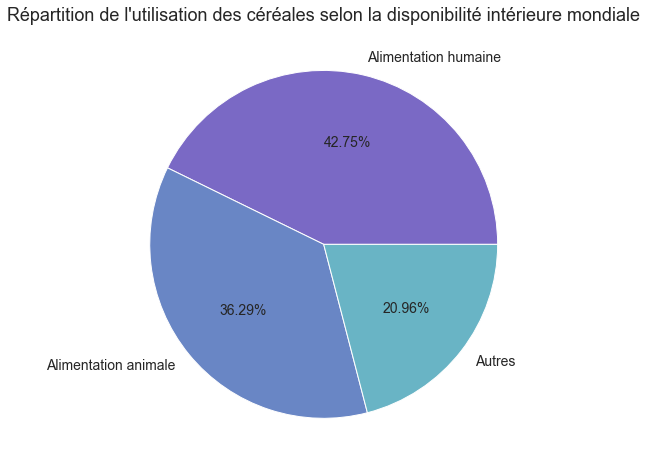

In [43]:
# define data
data = [cereales_humaines,cereales_animales,cereales_dispo_int-(cereales_animales+cereales_humaines)]
labels = ['Alimentation humaine','Alimentation animale','Autres']

#graph
plt.figure(figsize=(12,8))
plt.title("Répartition de l'utilisation des céréales selon la disponibilité intérieure mondiale",size=18)
plt.pie(data, labels=labels, autopct='%.2f%%',textprops={'fontsize':14},colors=['#7a69c5','#6986c5','#69b4c5'])
plt.show()

<font color=#c5a869>**Taux de l'utilisation des céréales dans la nourriture animale & humaine**</font>

In [44]:
nourriture_humaines = df_dispoAlimentaire['Nourriture'].sum()
nourriture_animale = df_dispoAlimentaire['Aliments pour animaux'].sum()

print('Les céréales sont utilisées pour',
      '{:.2%}'.format(cereales_animales/nourriture_animale),'de l\'alimentation animale et à',
      '{:.2%}'.format(cereales_humaines/nourriture_humaines),'de l\'alimentation humaine.')

Les céréales sont utilisées pour 66.98% de l'alimentation animale et à 21.10% de l'alimentation humaine.


---

## <font color = #6986C5> Thaïlande : exportation de manioc et sous-nutrition </font>

La deuxième requête de Julien concerne la **Thaïlande**. D'après lui, il y aurait quelque choses d'intéressant sur l'exportation de manioc dans le pays ainsi que la proportion de personnes en sous-nutrition dans le pays. 

In [45]:
# Création du dataframe Thaïlande - Manioc
df_ThailandeManioc = df_dispoAlimentaire[(df_dispoAlimentaire['Zone']=='Thaïlande')\
                                         &(df_dispoAlimentaire['Produit']=='Manioc')]
exportThailandeManioc = df_ThailandeManioc['Exportations - Quantité'].sum()
df_ThailandeManioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


Petit rappel sur la disponibilité intérieure : 
> **Disponibilité intérieure** = Production + Importations + Variations de stock (?) - Exportations 

#### <font color=#c5a869>Taux exportation : calcul comme exportation/production </font>

In [46]:
# Taux d'exportation du manioc de la Thaïlande :
tx_exportThailandeManioc = df_ThailandeManioc['Exportations - Quantité']/df_ThailandeManioc['Production']

print('En 2017, la Thaïlande exporte','{:.2%}'.format(tx_exportThailandeManioc.iloc[0]),'de son manioc.')

# Calcul de la part exportation du manioc de la Thaïlande dans le monde
exportMondeManioc = df_dispoAlimentaire["Exportations - Quantité"][df_dispoAlimentaire["Produit"]=="Manioc"].sum()
print()
print('En 2017, {:.2%} du Manioc exporté dans le monde provenait de la Thaïlande'.format(exportThailandeManioc/exportMondeManioc))
                                                                                                            

En 2017, la Thaïlande exporte 83.41% de son manioc.

En 2017, 69.94% du Manioc exporté dans le monde provenait de la Thaïlande


#### <font color=#c5a869>Calcul proportion de personnes en sous-nutrition : Thaïlande</font>

In [47]:
# Personnes en sous-nutrition - Thaïlande (2017):
popSousNutriThailande = pd.to_numeric(df_sousNutrition[(df_sousNutrition['Zone']=='Thaïlande')\
                                            &(df_sousNutrition['Année']=='2016-2018')]['Valeur'].values) # pd.to_numeric car dans le dataframe celui-ci n'est pas numeric mais en objet

# Population - Thaïlande (2017) :
popThailande = (df_population[(df_population['Zone']=='Thaïlande')\
                                            &(df_population['Année']==2017)]['Valeur'].values)/1000 # la valeur est en millier d'habitants, on la transforme en millions pour correspondre


# Taux personnes en sous-nutrition/population - Thaïlande (2017):
tauxThailande = pd.Series(popSousNutriThailande/popThailande)
print('En 2017,','{:.2%}'.format(tauxThailande.iloc[0]),'de la population thaïlandaise était en sous-nutrition.')


En 2017, 8.96% de la population thaïlandaise était en sous-nutrition.


Donc si on récapitule, nous avons pour la Thaïlande en 2017 :

Exportation de manioc | Population en sous-nutrition| Part de l'exportation du manioc dans le monde
:----------------------:|:-------------------------:|:-------------------------:
83.41 %|8.96 %|69.94%

---
## <font color = #6986C5> Requête Mélanie : étude plus fine pour chacun des pays </font>

À la suite des différentes requête précédente, nous recevons un message de Mélanie :

> **Mélanie** : Tout à fait ! Je souhaiterais avoir une étude un peu plus fine pour chacun des pays. Par exemple, j’aimerais que tu puisses nous donner les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017, ceux qui ont le plus bénéficié d’aide depuis 2013, ceux ayant le plus/le moins de disponibilité/habitant, etc., et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être le plus en difficulté, au niveau alimentaire.

Nous allons donc effectué ses différentes requêtes.

---
### <font color = #7a69c5> Sous-alimentation : proportion de personnes sous-alimentées la plus forte en 2017 </font>

Pour rappel : 
- df_population2017 : population pour chaque pays exprimé en milliers d'habitants durant l'année 2017
- df_sousNutrition : dataframe concernant le fichier d'insécurité alimentaire


De plus, il existe une***différence*** entre la proportion de personnes recensées et estimées, dû au manque de 48% de données dans notre dataframe *'sousNutrition'*. Les données manquantes sont potentiellement dû soit à des pays qui n'ont pas d'habitants en sous-nutrition (pays développés), soit à des pays dont la mesure de cette donnée est trop difficile.

L'estimation est réalisé afin de traiter les valeurs manquantes des zones non comprises dans le dataframe sous-nutrition par rapport au dataframe population ; dont les pays pour lesquels l'on sait qu'il existe des problèmes de nutrition mais où il est difficile d'obtenir des données en raison du manque de moyens, conflits etc...

Ne pas **oublier** le remplacement de la valeur '<0.1' dans le dataframe sous-nutrition par 0.05

In [48]:
# Population en sous-nutrition en 2017 pour chaque pays
df_sousNutrition2017=df_sousNutrition[df_sousNutrition['Année']=='2016-2018']

In [49]:
# Jointure entre les deux dataframes :
j_sousNutritionPop2017 = pd.merge(
                df_population2017,df_sousNutrition2017, on='Zone')
j_sousNutritionPop2017 = j_sousNutritionPop2017.drop('Année_y', 1)
j_sousNutritionPop2017 = j_sousNutritionPop2017.rename(columns = {'Année_x':'Année',
                                                                 "Valeur_x":"Population",
                                                                 "Valeur_y":"Population sous-nutrition"
                                                                 })
j_sousNutritionPop2017.head()

,Zone,Année,Population,Population sous-nutrition
0,Afghanistan,2017,36296.113,10.5
1,Afrique du Sud,2017,57009.756,3.1
2,Albanie,2017,2884.169,0.1
3,Algérie,2017,41389.189,1.3
4,Allemagne,2017,82658.409,NaN


**Notes concernant le calcul de proportion :**
- Dans la variable 'proportion' permettant d'avoir la proportion dans chaque pays de personnes en sous-alimentation, il y a une division par 1000 et une multiplication par 100. 

- La division sert à transformé les milliers d'habitants en millions d'habitants pour correspondre à la valeur en millions d'habitants des personnes sous-alimentées dans le pays.

- La multiplication nous permet d'avoir la proportion directement en pourcentage.

In [50]:
# Ajout d'une colonne dans la jointure pour calculer la proportion de personnes en sous-alimentation
j_sousNutritionPop2017=j_sousNutritionPop2017.assign(
                proportion=(j_sousNutritionPop2017["Population sous-nutrition"]/(j_sousNutritionPop2017["Population"]/1000))*100)
j_sousNutritionPop2017

,Zone,Année,Population,Population sous-nutrition,proportion
0,Afghanistan,2017,36296.113,10.5,28.928718
1,Afrique du Sud,2017,57009.756,3.1,5.437666
2,Albanie,2017,2884.169,0.1,3.467203
3,Algérie,2017,41389.189,1.3,3.140917
4,Allemagne,2017,82658.409,NaN,NaN
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402.484,8.0,27.208586
199,Viet Nam,2017,94600.648,6.5,6.870989
200,Yémen,2017,27834.819,NaN,NaN
201,Zambie,2017,16853.599,NaN,NaN


In [51]:
# Top 10 : pays ayant la proportion de personnes sous-alimentées la plus importante en 2017
j_sousNutritionPop2017.nlargest(10,columns="proportion") # 1ère méthode

j_sousNutritionPop2017.sort_values('proportion',ascending=False).head(10) # 2ème méthode

,Zone,Année,Population,Population sous-nutrition,proportion
51,Dominique,2017,71.458,0.05,69.971172
78,Haïti,2017,10982.366,5.30,48.259182
157,République populaire démocratique de Corée,2017,25429.825,12.00,47.188685
164,Saint-Vincent-et-les Grenadines,2017,109.827,0.05,45.526146
98,Kiribati,2017,114.158,0.05,43.798945
108,Madagascar,2017,25570.512,10.50,41.062924
103,Libéria,2017,4702.226,1.80,38.279742
100,Lesotho,2017,2091.534,0.80,38.249438
183,Tchad,2017,15016.753,5.70,37.957606
161,Rwanda,2017,11980.961,4.20,35.055619


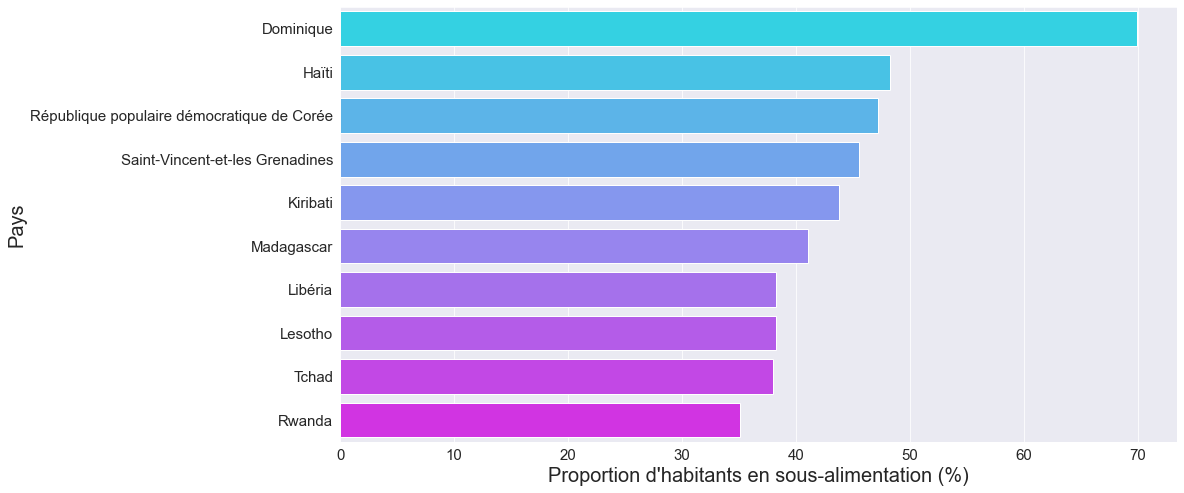

In [52]:
# Graphique : Pays ayant la proportion de personnes sous-alimentées la plus importante en 2017 
plt.figure(figsize=(15,8))
sns.barplot(data=j_sousNutritionPop2017.sort_values('proportion',ascending=False).head(10),
            y='Zone',
            x='proportion',
            hue='Zone',
            dodge=False,
            palette='cool'
           )
plt.tick_params(axis='both',labelsize=15)
plt.ylabel('Pays',size=20)
plt.xlabel('Proportion d\'habitants en sous-alimentation (%)',size=20)
#plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,title='Zone',fontsize=14,title_fontsize=14)
plt.legend([],[],frameon=False)
plt.show()

**Attention** : 

Dans ce tableau, certains pays ont 0.05 en 'Population sous-nutrition'. Pour rappel nous avons modifié au début la valeur '<0.1' par la valeur '0.05'. 

Ci-dessous le tableau qui correspond au 10 pays ayant la proportion de personnes sous-alimentées la plus importante en 2017 n'ayant pas subi le changement de variable. 

In [53]:
j_sousNutritionPop2017[j_sousNutritionPop2017['Population sous-nutrition']!=0.05].sort_values('proportion',ascending=False).head(10)

,Zone,Année,Population,Population sous-nutrition,proportion
78,Haïti,2017,10982.366,5.3,48.259182
157,République populaire démocratique de Corée,2017,25429.825,12.0,47.188685
108,Madagascar,2017,25570.512,10.5,41.062924
103,Libéria,2017,4702.226,1.8,38.279742
100,Lesotho,2017,2091.534,0.8,38.249438
183,Tchad,2017,15016.753,5.7,37.957606
161,Rwanda,2017,11980.961,4.2,35.055619
121,Mozambique,2017,28649.018,9.4,32.810898
186,Timor-Leste,2017,1243.258,0.4,32.173531
0,Afghanistan,2017,36296.113,10.5,28.928718


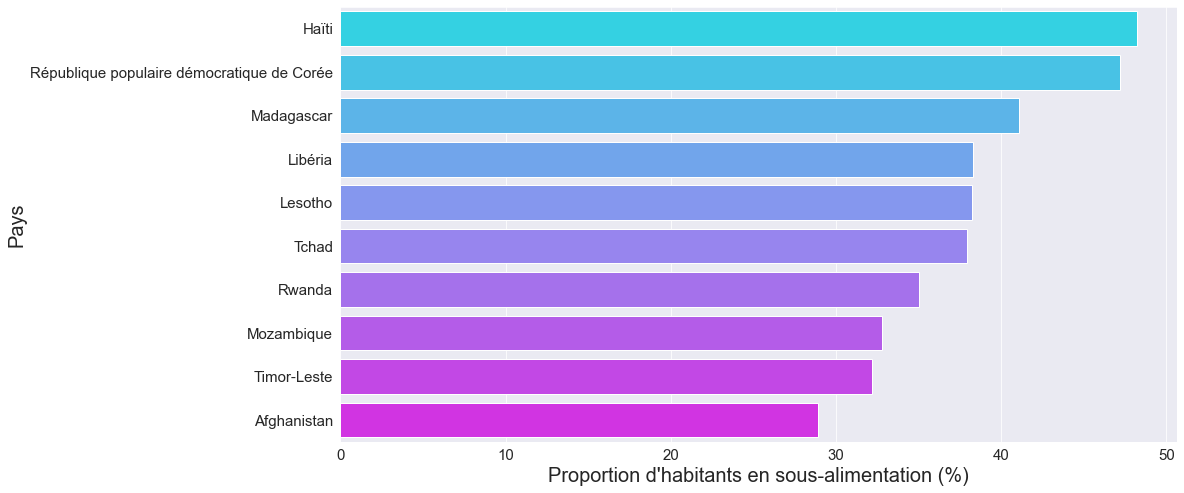

In [54]:
# Graphique : Pays ayant la proportion de personnes sous-alimentées la plus importante en 2017 
plt.figure(figsize=(15,8))
sns.barplot(data=j_sousNutritionPop2017[j_sousNutritionPop2017['Population sous-nutrition']!=0.05].sort_values('proportion',ascending=False).head(10),
            y='Zone',
            x='proportion',
            hue='Zone',
            dodge=False,
            palette='cool'
           )
plt.tick_params(axis='both',labelsize=15)
plt.ylabel('Pays',size=20)
plt.xlabel('Proportion d\'habitants en sous-alimentation (%)',size=20)
#plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,title='Zone',fontsize=14,title_fontsize=14)
plt.legend([],[],frameon=False)
plt.show()

---

### <font color = #7a69c5>Pays qui ont bénéficié le plus d'aide alimentaire depuis 2013 </font>

In [55]:
# Inspection du dataframe
df_aideAlimentaire.describe(include='all')

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475.000000,1475,1475.00000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.96678
...,...,...,...,...
min,NaN,2013.000000,NaN,0.00000
25%,NaN,2013.000000,NaN,287.50000
50%,NaN,2014.000000,NaN,1178.00000
75%,NaN,2015.000000,NaN,4334.50000


In [56]:
df_aideAlimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [57]:
df_aideAlimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [58]:
df_aideAlimentaire.isna().mean()

Pays bénéficiaire    0.0
Année                0.0
Produit              0.0
Valeur               0.0
dtype: float64

In [59]:
df_aideAlimentaire['Année'].unique()

array([2013, 2014, 2015, 2016])

Après cette analyse, on peut constater que le dataframe : 
- contient les bons types de données pour les variables,
- ne contient pas de données manquantes ; 
- dans la colonne 'Année' : valeurs se situant entre 2013 & 2016.
    - *Pas besoin de supprimer/nettoyer les données pour le calcul*

In [60]:
# Calcul du top 10 des pays les plus bénéficiaires de l'aide alimentaire :
df_aideAlimentaire.groupby('Pays bénéficiaire').agg(
    {'Valeur':np.sum}).sort_values('Valeur',ascending=False).head(10)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


In [70]:
df_aideAlimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


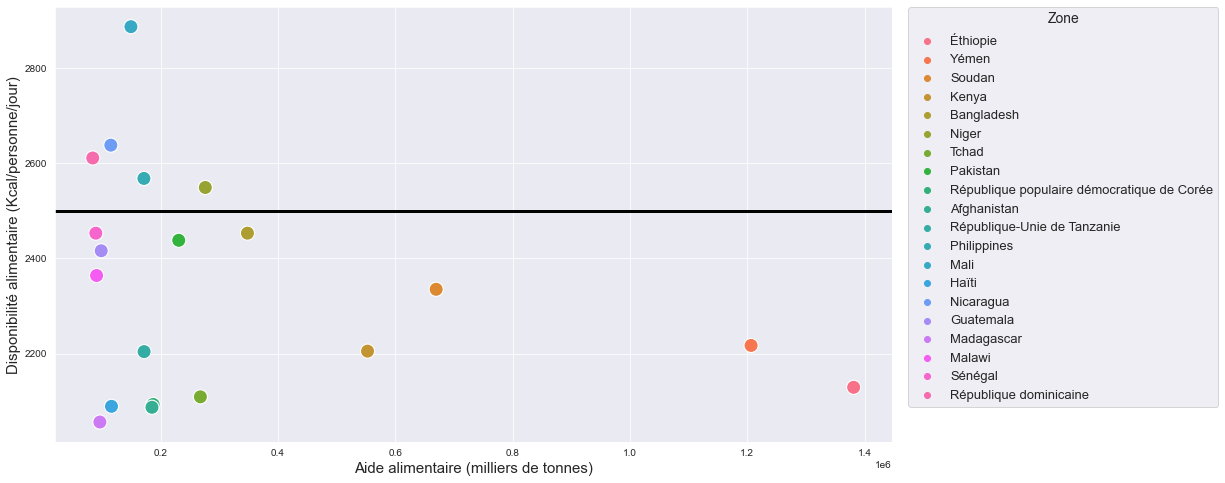

In [61]:
# Create data
df_aideAlimentaire2 = df_aideAlimentaire.copy()
df_aideAlimentaire2 = df_aideAlimentaire2.rename(columns={'Pays bénéficiaire':'Zone'})
data_graph1 = pd.merge(df_aideAlimentaire2.groupby('Zone').agg({'Valeur':np.sum}),df_dispoAlimentaire2.groupby('Zone').agg({'Disponibilité alimentaire (Kcal/personne/jour)':np.sum}),on='Zone')                             
data_graph1.reset_index(inplace=True)

# Graphique : Aide alimentaire en fonction de la disponibilité alimentaire du pays
top20 = data_graph1.sort_values('Valeur',ascending=False).head(20)
plt.figure(figsize=(15,8))
sns.scatterplot(data=top20,
                x='Valeur',
                y='Disponibilité alimentaire (Kcal/personne/jour)',
                hue='Zone',
                s=200,
               )
plt.xlabel('Aide alimentaire (milliers de tonnes)',size=15)
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)',size=15)
#plt.ylim(0,3500)
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,title='Zone',fontsize=13,title_fontsize=14)
plt.axhline(y=2500, color='black', linestyle='-', linewidth=3)
plt.show()

Le top 10 des pays les plus bénéficiaires de l'aide alimentaire dans le monde.

*Les données 'valeur' sont exprimés en tonnes*.

---
### <font color = #7a69c5> Pays ayant le plus/le moins de disponibilité alimentaire par habitant :</font>

Pour répondre à cette question, nous aurons besoin du dataframe population, dispoAlimentaire.

Dans le dataframe population, on pourra trouver la population pour chaque pays en 2017.\
Dans le dataframe dispoAlimentaire, la disponibilité alimentaire pour chaque pays pour l'année 2017. 

In [62]:
# Jointure entre le dataframe population2017 et celui delui de la disponibilité alimentaire pour chaque pays. 
df_dispoHabitant = pd.merge(df_population2017,
                           df_dispoAlimentaire.groupby('Zone').agg({'Disponibilité alimentaire (Kcal/personne/jour)':np.sum}),on='Zone')
df_dispoHabitant = df_dispoHabitant.rename(columns = {'Valeur':'Population'})
df_dispoHabitant.head()

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,2087.0
1,Afrique du Sud,2017,57009.756,3020.0
2,Albanie,2017,2884.169,3188.0
3,Algérie,2017,41389.189,3293.0
4,Allemagne,2017,82658.409,3503.0


In [69]:
df_dispoAlimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


On a effectué une jointure entre le dataframe df_population2017 et le dataframe df_dispoAlimentaire selon l'élement clé **'Zone'**. 
Pour ne pas récupérer tout le dataframe mais uniquement la **somme de disponibilité intérieure de chaque pays** nous avons effectué un **groupeby** du second dataframe pour lui calculer sa somme correspondante. 

*Rappel : les données 'population' sont exprimées en milliers d'habitants*

Nous allons maintenant calculer les pays ayant le plus/le moins de disponibilité intérieure par habitant.

**Top 10 pays : le plus de disponibilité alimentaire par habitant :**

In [63]:
df_dispoHabitant.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(10)

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,2017,8819.901,3770.0
17,Belgique,2017,11419.748,3737.0
163,Turquie,2017,81116.450,3708.0
54,États-Unis d'Amérique,2017,325084.756,3682.0
80,Israël,2017,8243.848,3610.0
78,Irlande,2017,4753.279,3602.0
81,Italie,2017,60673.701,3578.0
95,Luxembourg,2017,591.910,3540.0
47,Égypte,2017,96442.591,3518.0
4,Allemagne,2017,82658.409,3503.0


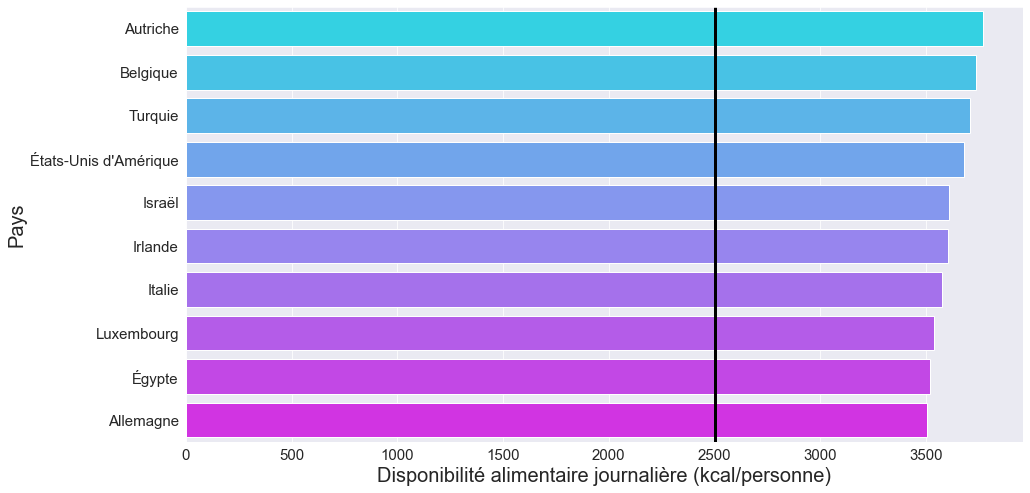

In [64]:
# Graphique : Top 10 Pays : le plus de disponibilité alimentaire par habitant
plt.figure(figsize=(15,8))
sns.barplot(data=df_dispoHabitant.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(10),
            y='Zone',
            x='Disponibilité alimentaire (Kcal/personne/jour)',
            hue='Zone',
            dodge=False,
            palette='cool'
           )
plt.tick_params(axis='both',labelsize=15)
plt.ylabel('Pays',size=20)
plt.xlabel('Disponibilité alimentaire journalière (kcal/personne)',size=20)
plt.axvline(x=2500, color='black', linestyle='-',linewidth=3)
#plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,title='Zone',fontsize=14,title_fontsize=14,frameon=False)
plt.legend([],[], frameon=False)
plt.show()

**Top 10 pays : le moins de disponibilité alimentaire par habitant** :

In [65]:
df_dispoHabitant.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).tail(10)

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
55,Éthiopie,2017,106399.924,2129.0
120,Ouganda,2017,41166.588,2126.0
171,Zimbabwe,2017,14236.595,2113.0
156,Tchad,2017,15016.753,2109.0
136,République populaire démocratique de Corée,2017,25429.825,2093.0
70,Haïti,2017,10982.366,2089.0
0,Afghanistan,2017,36296.113,2087.0
97,Madagascar,2017,25570.512,2056.0
170,Zambie,2017,16853.599,1924.0
131,République centrafricaine,2017,4596.023,1879.0


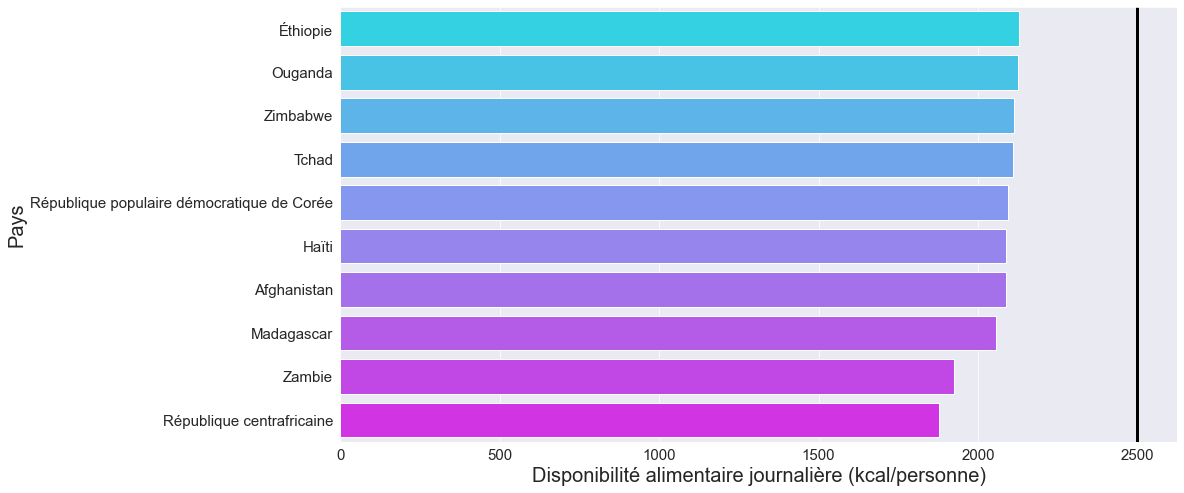

In [66]:
# Graphique : Top 10 Pays : le moins de disponibilité alimentaire par habitant
plt.figure(figsize=(15,8))
sns.barplot(data=df_dispoHabitant.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).tail(10),
            y='Zone',
            x='Disponibilité alimentaire (Kcal/personne/jour)',
            hue='Zone',
            dodge=False,
            palette='cool'
           )
plt.tick_params(axis='both',labelsize=15)
plt.ylabel('Pays',size=20)
plt.xlabel('Disponibilité alimentaire journalière (kcal/personne)',size=20)
plt.axvline(x=2500, color='black', linestyle='-',linewidth=3)
#plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,title='Zone',fontsize=14,title_fontsize=14)
plt.legend([],[],frameon=False)
plt.show()

---

## <font color = #6986C5> Graphique bonus : </font>

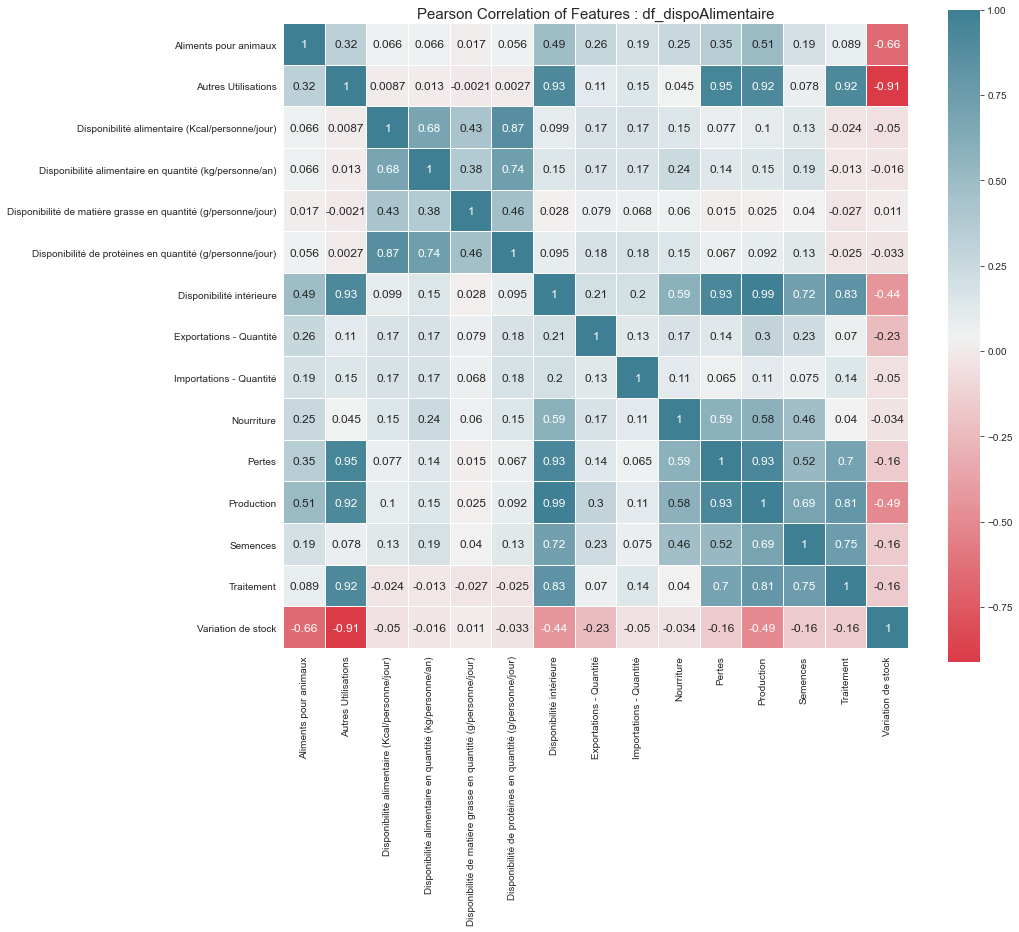

In [67]:
# Person Correlation of Features : df_dispoAlimentaire
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features : df_dispoAlimentaire', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df_dispoAlimentaire.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()